In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import pickle

from datetime import datetime, timedelta
import seaborn as sns

In [3]:
output_list = ['배추',
 '무',
 '양파',
 '건고추',
 '마늘',
 '대파',
 '얼갈이배추',
 '양배추',
 '깻잎',
 '시금치',
 '미나리',
 '당근',
 '파프리카',
 '새송이',
 '팽이버섯',
 '토마토',
 '청상추',
 '백다다기',
 '애호박',
 '캠벨얼리',
 '샤인마스캇']

In [4]:
data1 = pd.read_pickle('/home/hshan/00_individual/SP2109/pp_data/public_train_data.pkl')

In [5]:
sub = pd.read_csv('/home/hshan/00_individual/SP2109/data/sample_submission.csv')
sub

,예측대상일자,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,2020-09-29+1week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-29+2week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-09-29+4week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-09-30+1week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-09-30+2week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2021-11-03+2week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,2021-11-03+4week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,2021-11-04+1week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,2021-11-04+2week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sub['예측대상일자'].str.split('+').str[1].str.slice(start=0, stop=1)

0      1
1      2
2      4
3      1
4      2
      ..
223    2
224    4
225    1
226    2
227    4
Name: 예측대상일자, Length: 228, dtype: object

In [7]:
sub.head(2)

,예측대상일자,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,2020-09-29+1week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-29+2week,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
target_list = sub.drop(['예측대상일자'], axis=1).columns.str.split('_').str[0]

In [9]:
ref_day_list = pd.to_datetime(sub['예측대상일자'].str.split('+').str[0])
ref_day_list = ref_day_list.drop_duplicates()

In [10]:
window_size_list = sub['예측대상일자'].str.split('+').str[1].str.slice(start=0, stop=1)
window_size_list = window_size_list.astype('int')*7
window_size_list = window_size_list.drop_duplicates()

In [11]:
dt_list = []
for ref_day in ref_day_list:

    for window_size in window_size_list:

        fct_day = ref_day + timedelta(days=window_size)
#         print(fct_day)
        dt_list.append(fct_day)

In [12]:
len(dt_list)

228

In [13]:
def make_df(df1):

    df2 = df1.copy()
    df2['year'] = df2.index.year
    df2['month'] = df2.index.month
    df2['day'] = df2.index.day
    df2['week'] = df2.index.weekday

    temp = pd.get_dummies(df2['week'])

    df3 = df2.copy()

    df3 = pd.concat([df3, temp], axis=1)
    df3 = df3.drop(['week'], axis=1)
    return df3

In [14]:
temp1 = pd.DataFrame(index = dt_list)
temp1.index.name = 'date'

In [15]:
md_data = make_df(temp1)

In [16]:
target_list

Index(['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치', '미나리',
       '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박', '캠벨얼리',
       '샤인마스캇'],
      dtype='object')

In [17]:
feature_cols = ['year', 'month', 'day', 0, 1, 2, 3, 4, 5, 6]

In [18]:
md_data

,year,month,day,0,1,2,3,4,5,6
date,,,,,,,,,,
2020-10-06,2020,10,6,0,1,0,0,0,0,0
2020-10-13,2020,10,13,0,1,0,0,0,0,0
2020-10-27,2020,10,27,0,1,0,0,0,0,0
2020-10-07,2020,10,7,0,0,1,0,0,0,0
2020-10-14,2020,10,14,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-11-17,2021,11,17,0,0,1,0,0,0,0
2021-12-01,2021,12,1,0,0,1,0,0,0,0
2021-11-11,2021,11,11,0,0,0,1,0,0,0


In [19]:
result = sub.copy()
for target in target_list:
    
    test_data = md_data.copy()

    try:
        with open('model/bo_model_{}.pkl'.format(target), 'rb') as f:
            gab_model = pickle.load(f)

        pred = gab_model.predict(test_data[feature_cols])

        result['{}_가격(원/kg)'.format(target)] = pred
        
    except FileNotFoundError:
        result['{}_가격(원/kg)'.format(target)] = 0
        
result.set_index('예측대상일자', inplace=True)

In [31]:
# result.to_csv('submission_0919_1.csv')

In [28]:
result.head()

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
예측대상일자,,,,,,,,,,,,,,,,,,,,,
2020-09-29+1week,1435.214663,1042.205203,893.833411,17717.391387,4822.228689,1963.463466,1914.227077,1110.145438,5528.204030,4901.511781,...,1537.026116,4727.034186,2225.025256,1931.359552,3623.986299,0,0,0,0,0
2020-09-29+2week,1599.616843,998.804946,979.956762,19253.504937,5028.208812,1943.254859,2336.860859,1196.339584,8835.611774,5240.698084,...,1654.051548,5019.668556,2230.202706,2117.247172,3804.779367,0,0,0,0,0
2020-09-29+4week,1759.621327,1299.306397,1033.866760,19450.282589,5102.069066,2043.326309,2202.893713,1493.924131,9457.687989,5608.494317,...,1724.564551,6330.657193,2507.296978,2111.836954,5388.901122,0,0,0,0,0
2020-09-30+1week,1632.148188,1048.942752,938.374776,21061.138579,4932.967952,1990.776019,2048.220337,1205.345506,6537.481328,4905.848748,...,1595.867243,4652.564155,2238.963453,1863.676963,3673.042814,0,0,0,0,0
2020-09-30+2week,1807.538973,999.026762,982.298850,20061.482373,5113.960436,1896.264896,2292.115737,1274.251287,9641.904785,5198.533340,...,1641.219190,6100.582086,2362.347552,2038.367621,4361.678466,0,0,0,0,0


In [29]:
td  = result.copy()

In [23]:
td['{}_가격(원/kg)'.format(output_list[0])]

예측대상일자
2020-09-29+1week    1435.214663
2020-09-29+2week    1599.616843
2020-09-29+4week    1759.621327
2020-09-30+1week    1632.148188
2020-09-30+2week    1807.538973
                       ...     
2021-11-03+2week    1670.673281
2021-11-03+4week    1162.932573
2021-11-04+1week    1467.424259
2021-11-04+2week    1678.341564
2021-11-04+4week    1190.044399
Name: 배추_가격(원/kg), Length: 228, dtype: float64

<AxesSubplot:xlabel='예측대상일자'>

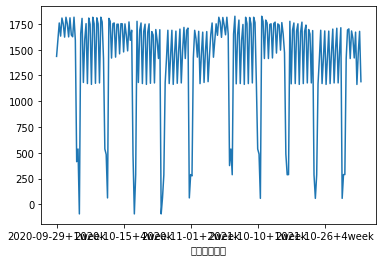

In [24]:
td['{}_가격(원/kg)'.format(output_list[0])].plot()

In [25]:
aa = pd.read_csv('../dacon_baseline.csv')

<AxesSubplot:>

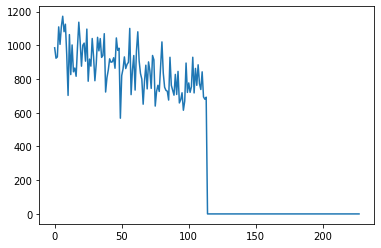

In [26]:
aa['{}_가격(원/kg)'.format(output_list[0])].plot()

In [30]:
td

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
예측대상일자,,,,,,,,,,,,,,,,,,,,,
2020-09-29+1week,1435.214663,1042.205203,893.833411,17717.391387,4822.228689,1963.463466,1914.227077,1110.145438,5528.204030,4901.511781,...,1537.026116,4727.034186,2225.025256,1931.359552,3623.986299,0,0,0,0,0
2020-09-29+2week,1599.616843,998.804946,979.956762,19253.504937,5028.208812,1943.254859,2336.860859,1196.339584,8835.611774,5240.698084,...,1654.051548,5019.668556,2230.202706,2117.247172,3804.779367,0,0,0,0,0
2020-09-29+4week,1759.621327,1299.306397,1033.866760,19450.282589,5102.069066,2043.326309,2202.893713,1493.924131,9457.687989,5608.494317,...,1724.564551,6330.657193,2507.296978,2111.836954,5388.901122,0,0,0,0,0
2020-09-30+1week,1632.148188,1048.942752,938.374776,21061.138579,4932.967952,1990.776019,2048.220337,1205.345506,6537.481328,4905.848748,...,1595.867243,4652.564155,2238.963453,1863.676963,3673.042814,0,0,0,0,0
2020-09-30+2week,1807.538973,999.026762,982.298850,20061.482373,5113.960436,1896.264896,2292.115737,1274.251287,9641.904785,5198.533340,...,1641.219190,6100.582086,2362.347552,2038.367621,4361.678466,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03+2week,1670.673281,1072.798070,1063.691312,18540.396363,5179.156067,1808.439404,1881.826169,1325.074348,8970.364034,4758.092346,...,1722.823730,5011.562349,2369.274406,1761.321353,5228.231435,0,0,0,0,0
2021-11-03+4week,1162.932573,1034.387301,1041.379914,20268.766526,4775.283015,1338.799549,1307.776582,1143.040677,4025.157670,3968.067015,...,1482.716871,3333.674127,2096.532421,1213.924931,3365.851391,0,0,0,0,0
2021-11-04+1week,1467.424259,1043.283481,1035.472231,19041.132137,4869.633693,1766.092460,1859.090988,1217.745654,7755.187133,4660.825026,...,1601.365444,3775.034233,2156.378035,1516.419817,3756.671733,0,0,0,0,0


In [27]:
aa

,예측대상일자,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,2020-09-29+1week,984.982178,860.302048,979.730844,9140.736055,5402.054449,1809.491739,1290.672847,863.224147,6300.015842,...,1395.842582,5056.512102,2810.301065,2285.599228,2954.958163,3734.592890,2581.684929,2193.304807,2269.762382,6860.346198
1,2020-09-29+2week,923.242271,723.848715,888.094723,12309.316370,4647.007543,1632.085906,1241.617994,781.480769,5762.147944,...,1186.763272,4536.590867,2425.053120,2273.181186,2584.565830,3470.496353,2137.372206,1974.740250,2255.759574,7228.751779
2,2020-09-29+4week,930.722207,787.830310,868.226409,9559.857748,5251.969394,1748.799146,1206.182110,801.575507,5503.465231,...,1375.640184,4362.532524,2492.021084,2444.725194,2719.148957,3571.640790,2546.041687,2530.997734,1134.730037,7489.745021
3,2020-09-30+1week,1108.983234,838.954773,931.904674,13104.829668,5464.924234,1848.154902,1280.479702,862.533544,6181.130017,...,1352.532953,4548.682565,2681.938171,2185.954864,3003.735431,4388.863171,2406.384061,2260.536312,2088.529058,9355.802536
4,2020-09-30+2week,1005.420014,788.827295,873.304963,9803.820573,5116.206922,1539.963953,1175.445399,840.986341,5687.927718,...,1197.013110,4328.430269,2402.071714,2097.810807,2576.544758,3192.577149,2211.513442,2126.536892,1347.249374,5194.376111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2021-11-03+2week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
224,2021-11-03+4week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
225,2021-11-04+1week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
226,2021-11-04+2week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
